### 灰度图

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt#matplotlib是RGB
%matplotlib inline

In [2]:
img = cv2.imread("data/cat.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray.shape

(414, 500)

In [3]:
cv2.imshow("灰度图", img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

### HSV

In [4]:
def my_imshow(img_name, img):
    cv2.imshow(img_name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)#便于颜色相关操作
my_imshow("hsv", hsv)


## 图像阈值

[[153 157 162 161 153]
 [119 124 129 131 128]
 [120 124 130 133 134]
 [153 157 162 164 165]
 [169 174 179 182 181]]
[[255 255 255 255 255]
 [  0   0 255 255 255]
 [  0   0 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]]
[[  0   0   0   0   0]
 [255 255   0   0   0]
 [255 255   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]
[[127 127 127 127 127]
 [119 124 127 127 127]
 [120 124 127 127 127]
 [127 127 127 127 127]
 [127 127 127 127 127]]
[[153 157 162 161 153]
 [  0   0 129 131 128]
 [  0   0 130 133 134]
 [153 157 162 164 165]
 [169 174 179 182 181]]
[[  0   0   0   0   0]
 [119 124   0   0   0]
 [120 124   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]


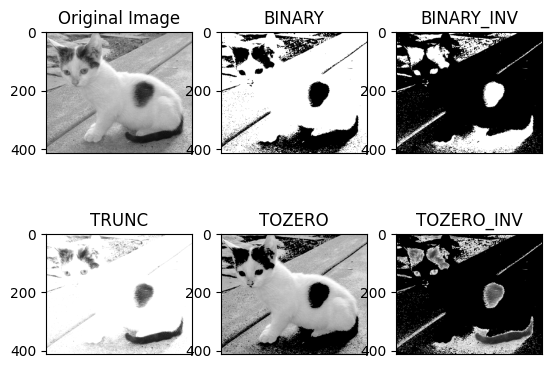

In [6]:
ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC) #thresh截断
ret, thresh4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', "BINARY", "BINARY_INV", "TRUNC", "TOZERO", "TOZERO_INV"]
images = [img_gray, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.xticks([])
    print(images[i][:5, :5])
plt.show()

## 图像平滑

In [7]:
img = cv2.imread("data/lenaNoise.png")
my_imshow("lenaNoise", img)

In [8]:
#均值滤波
blur = cv2.blur(img, (3, 3))
img_blur = np.hstack([img, blur])
my_imshow('img_blur', img_blur)

In [9]:
#方框滤波
box = cv2.boxFilter(img, -1, (3, 3))
img_box = np.hstack([img, box])
my_imshow('img_box', img_box)

In [11]:
#高斯滤波
aussian = cv2.GaussianBlur(img, (5, 5), 1)
img_aussian = np.hstack([img, aussian])
my_imshow("img_aussian", img_aussian)

In [14]:
help(cv2.GaussianBlur)

Help on built-in function GaussianBlur:

GaussianBlur(...)
    GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
    .   @brief Blurs an image using a Gaussian filter.
    .   
    .   The function convolves the source image with the specified Gaussian kernel. In-place filtering is
    .   supported.
    .   
    .   @param src input image; the image can have any number of channels, which are processed
    .   independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
    .   @param dst output image of the same size and type as src.
    .   @param ksize Gaussian kernel size. ksize.width and ksize.height can differ but they both must be
    .   positive and odd. Or, they can be zero's and then they are computed from sigma.
    .   @param sigmaX Gaussian kernel standard deviation in X direction.
    .   @param sigmaY Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be
    .   equal to sigmaX, if both sigmas are z

In [15]:
# 中值滤波
median = cv2.medianBlur(img, 5)
img_median = np.hstack((img, median))
my_imshow("img_median", img_median)

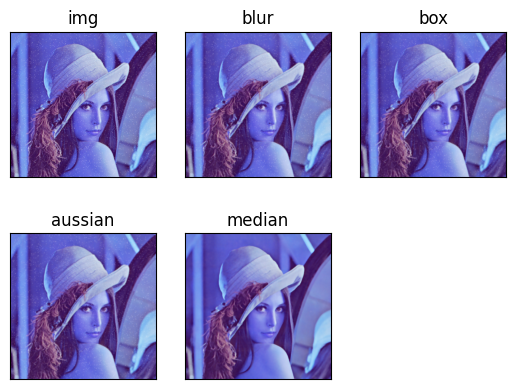

In [19]:
#对比所有滤波效果
imgs = [img, blur, box, aussian, median]
titles = ['img', 'blur', 'box', 'aussian', 'median']
i = 0
for image, title in zip(imgs, titles):
    plt.subplot(2, 3, i+1)
    plt.imshow(image, 'gray')
    plt.title(title)
    plt.xticks([]), plt.yticks([])
    i+=1

plt.show()